In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     1.387449
10    0.453245
20    2.618787
30    2.174963
40    2.561957
50    2.802349
60    2.494352
70    3.887565
80    4.120394
90    3.665059
dtype: float64

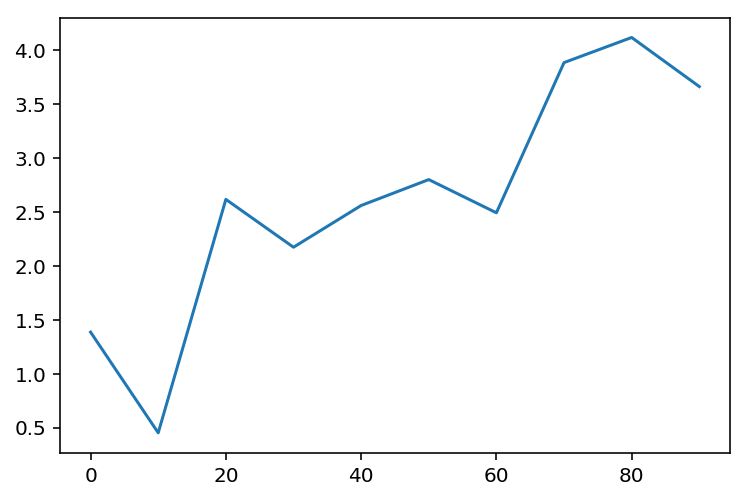

In [5]:
s.plot()

In [6]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', "C", "D"], index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.710265,-0.593290,1.024663,-1.126330
10,-0.266451,-1.056984,4.154169,-1.349854
20,0.361543,-0.612742,4.580999,-1.643986
30,0.456364,-0.876514,6.404592,0.716501
40,0.758678,0.087624,6.676027,2.423421
50,0.260504,0.607074,6.785111,2.035983
60,1.274386,2.488079,6.974049,2.521902
70,3.001659,1.905160,6.445939,2.932318
80,2.881518,2.282074,8.411637,2.542380
90,3.667413,2.613910,8.545546,1.596931


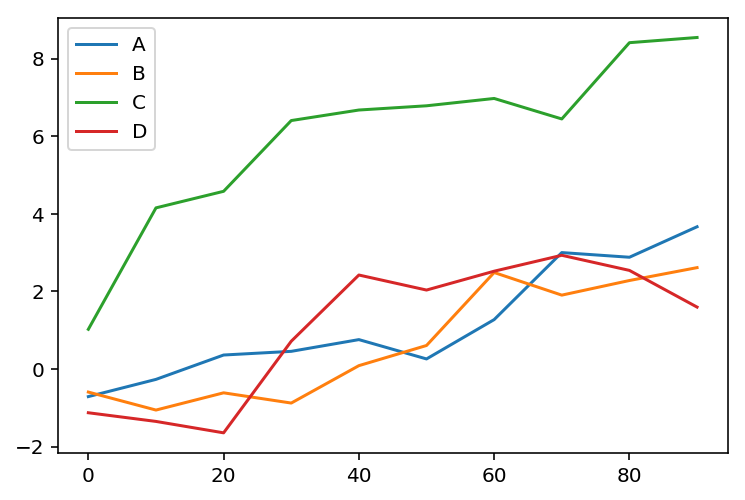

In [7]:
df.plot()

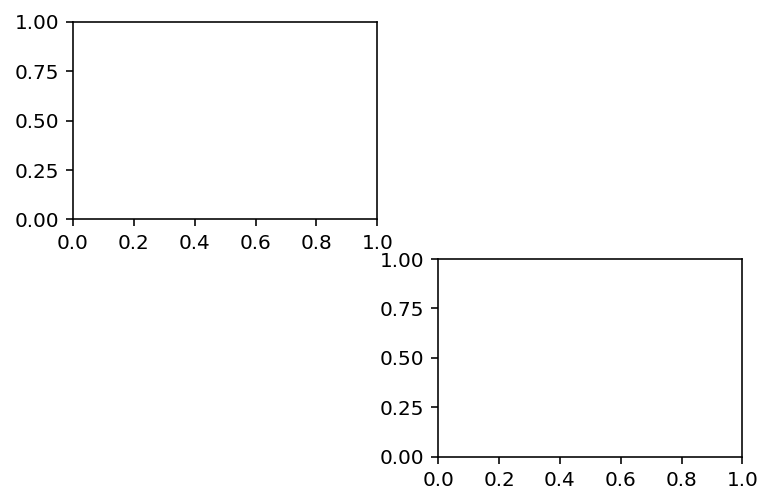

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,4)

In [11]:
s.plot(ax=ax1)
df.plot(ax=ax2)

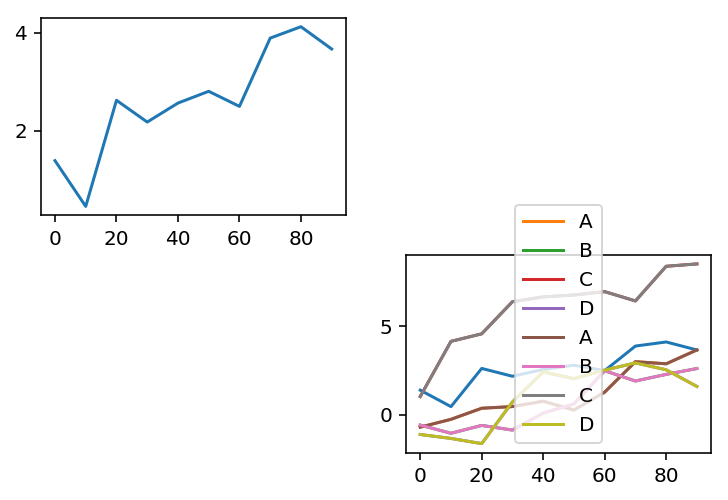

In [12]:
fig

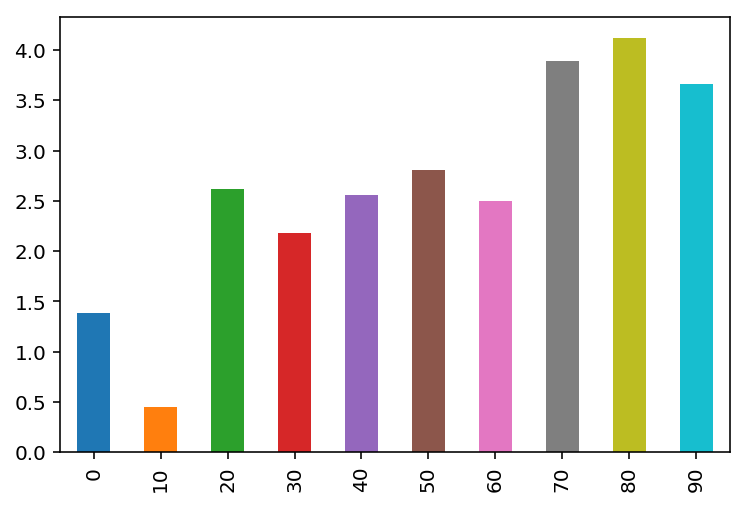

In [13]:
s.plot(kind='bar')

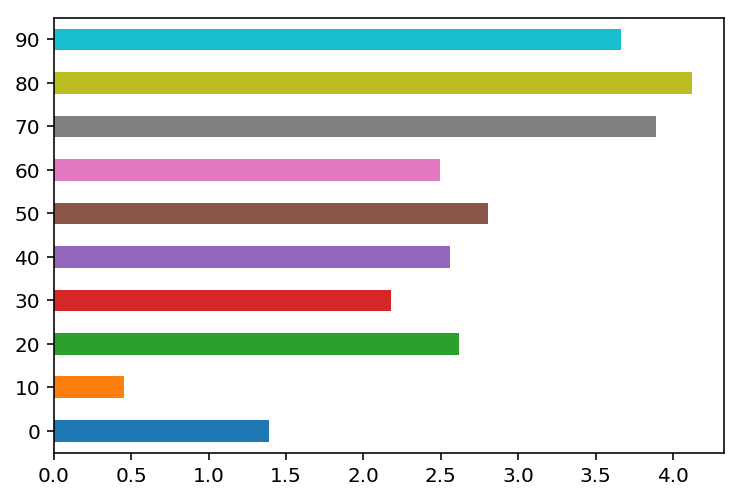

In [14]:
s.plot(kind='barh')

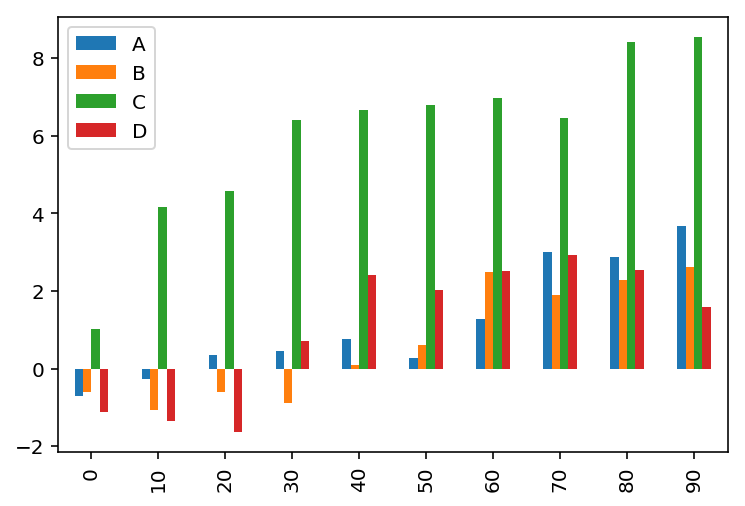

In [15]:
df.plot(kind='bar')

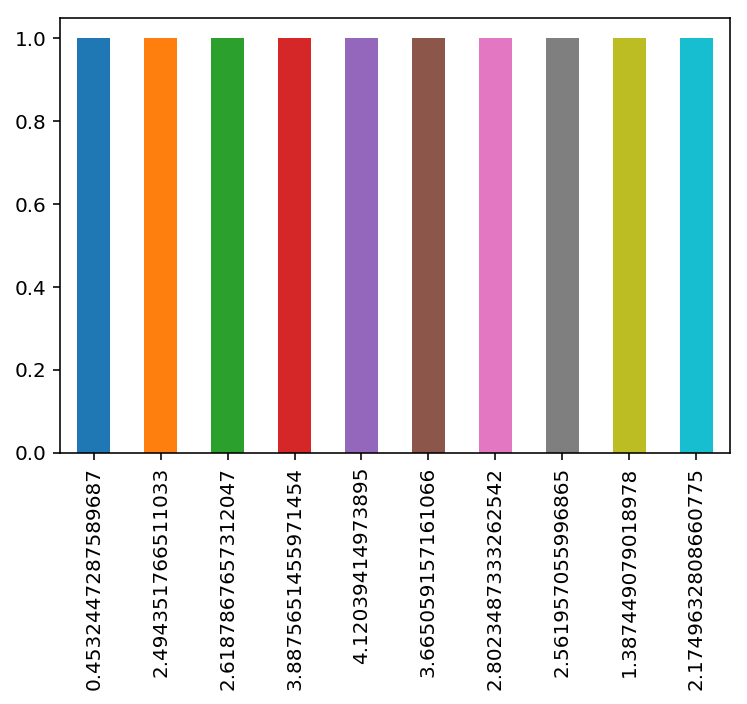

In [16]:
s.value_counts().plot(kind="bar")

In [21]:
tips = pd.read_csv('../examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [18]:
party_counts = pd.crosstab(tips.day, tips.size)
party_counts

col_0,1464
day,
Fri,19
Sat,87
Sun,76
Thur,62


tips['tip_pct'] = tips['tip']/tips['total_bill']
tips

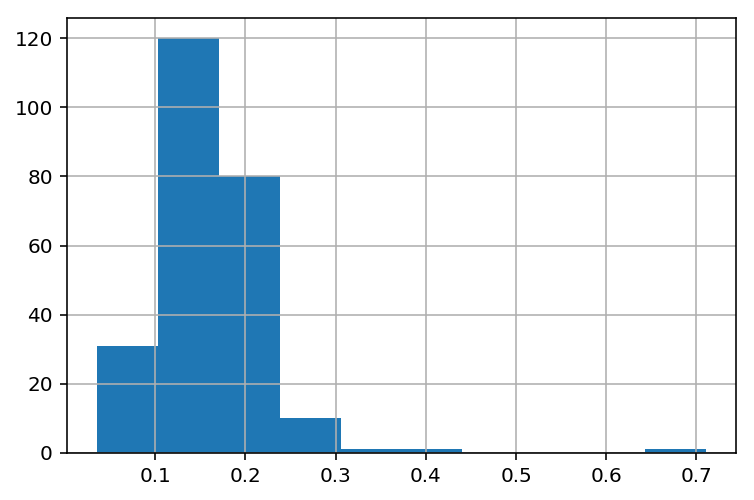

In [32]:
tips['tip_pct'].hist(bins=10)

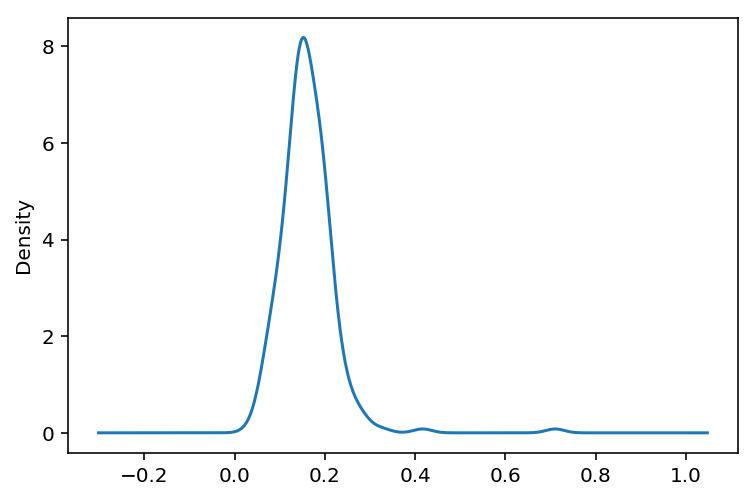

In [33]:
tips['tip_pct'].plot(kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000187D81D4F60>,
      dtype=object)

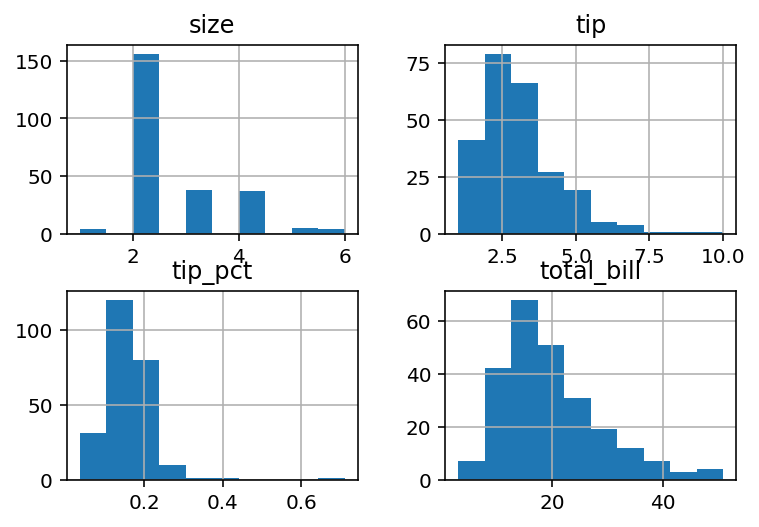

In [34]:
tips.hist(bins=10)

In [3]:
macro = pd.read_csv('../examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [9]:
trans_data = np.log(data)
trans_data.head()

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659


In [12]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


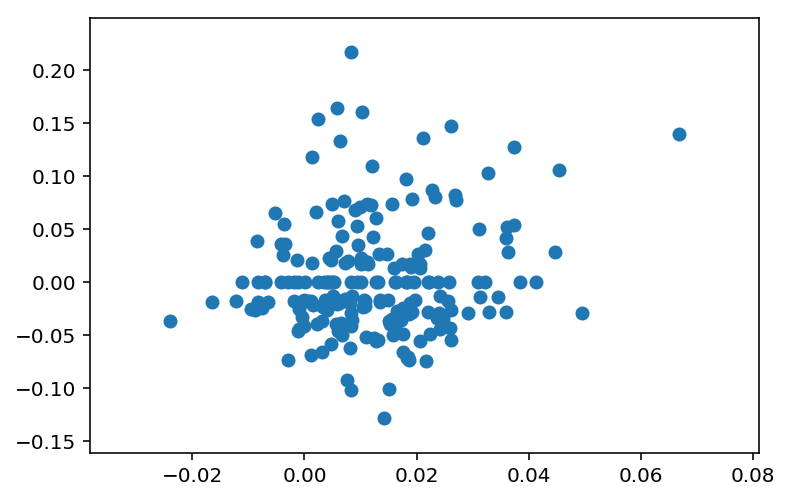

In [15]:
plt.scatter(trans_data['m1'], trans_data['unemp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A62C576908>,
      dtype=object)

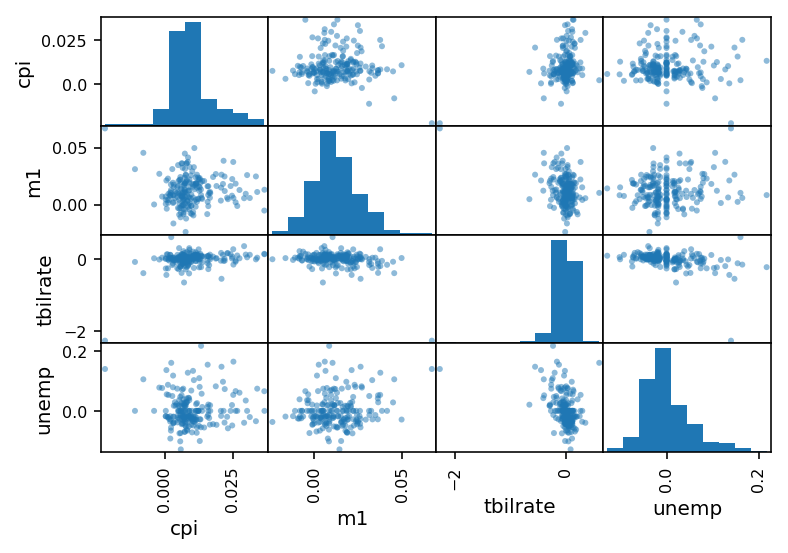

In [17]:
pd.plotting.scatter_matrix(trans_data)

In [18]:
data = pd.read_csv('../datasets/haiti/Haiti.csv')
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [19]:
data[["INCIDENT DATE", "LATITUDE", "LONGITUDE"]][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [20]:
data["CATEGORY"][:10]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
8    2. Urgences logistiques | Vital Lines, 2f. San...
9    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [21]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287
